<a href="https://colab.research.google.com/github/Camillabgarcia/visao_computacional_opencv/blob/main/Analise_Classificacao_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

01.Conhecendo o problema.

Instalando as bibliotecas necessárias:

In [ ]:
!pip install opencv-python==4.6.0.66





   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 11.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.10.0.84
    Uninstalling opencv-python-4.10.0.84:
      Successfully uninstalled opencv-python-4.10.0.84


In [ ]:
!pip install dlib



Importando as bibliotecas:

In [ ]:
import cv2
print(cv2.__version__)

4.6.0


In [ ]:
import dlib
print(dlib.__version__)

19.24.2


Instalando as bibliotecas que lidam com imagens:

In [ ]:
!pip install matplotlib seaborn

Importando as bibliotecas:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Importando os dados diretamente de um repositório do GitHub:

In [ ]:
! git clone https://github.com/alura-cursos/alura-analise-facial

Cloning into 'alura-analise-facial'...
remote: Enumerating objects: 826, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 826 (delta 0), reused 0 (delta 0), pack-reused 823 (from 1)
Receiving objects: 100% (826/826), 143.22 MiB | 27.46 MiB/s, done.
Resolving deltas: 100% (27/27), done.


Abrindo uma imagem:

In [ ]:
imagem = cv2.imread('/content/alura-analise-facial/imagens/px-girl.jpg')

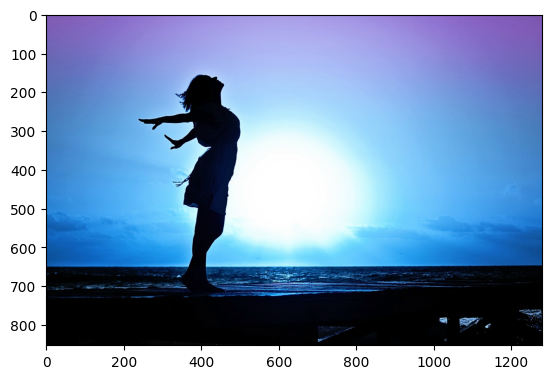

In [ ]:
plt.imshow(imagem)

Realizando a inversão do BGR para RGB:

In [ ]:
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

Plotando a imagem novamente:

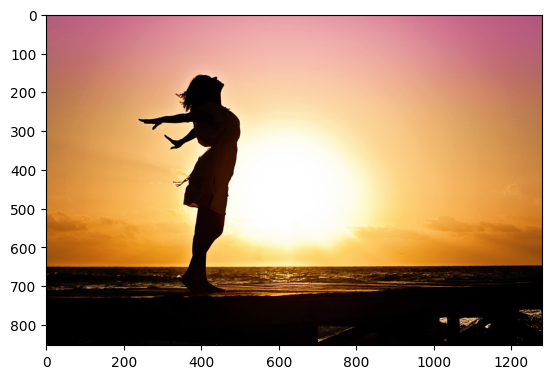

In [ ]:
plt.imshow(imagem_rgb)

Alterando as cores para cinza:

In [ ]:
imagem_gray = cv2.cvtColor(imagem_rgb, cv2.COLOR_BGR2GRAY)


Plotando a imagem:

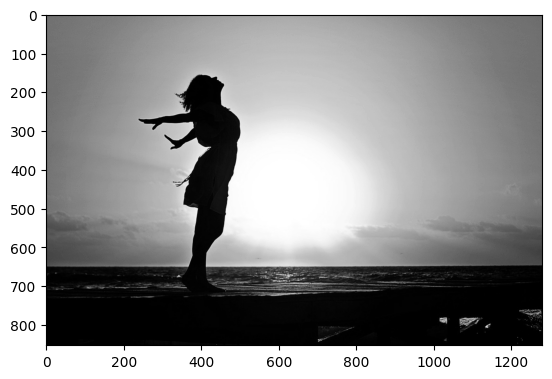

In [ ]:
plt.imshow(imagem_gray, cmap='gray')

OBS: Alguns tipos de análise - do tipo encontrar um rosto em uma imagem - podemos aplicar um classificador em cascata, nós usamos imagens em escala de cinza pois simplifica bem essa atividade. Nós conseguimos inclusive executar isso em tempo real porque ele consegue ser muito veloz.

Definindo uma região de interesse:

In [ ]:
imagem = cv2.imread('/content/alura-analise-facial/imagens/px-people.jpg')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

Visualizando a imagem:

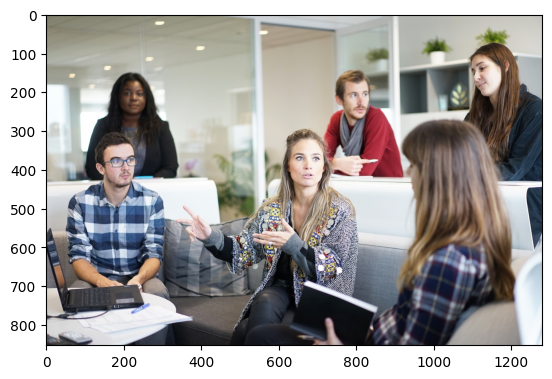

In [ ]:
plt.imshow(imagem)

Descobrindo o tamanho da imagem:

In [ ]:
imagem.shape

(853, 1280, 3)

Extração da região de interesse de forma manual:

In [ ]:
imagem_roi = imagem[100:200, 1000:1200]

Visualizando o recorte:

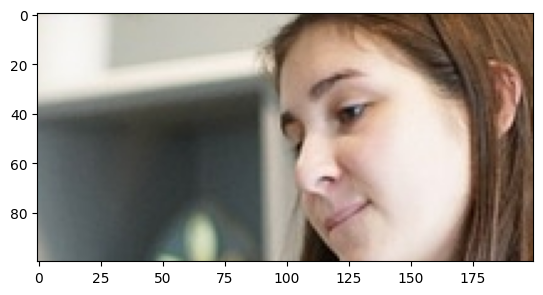

In [ ]:
plt.imshow(imagem_roi)

Salvando a imagem em um arquivo externo:

In [ ]:
cv2.imwrite('imagem_roi.png', imagem_roi)

True

Alterando as distorções de cores:

In [ ]:
imagem_roi_bgr = cv2.cvtColor(imagem_roi, cv2.COLOR_BGR2RGB)
cv2.imwrite('imagem_roi.png', imagem_roi_bgr)

True

02. Segmentação de faces.

Classificador de cascata de Haar.

Identificando faces de forma automática, utilizando um classificador especialmente desenvolvido para isso:

In [ ]:
imagem = cv2.imread('/content/alura-analise-facial/imagens/px-people.jpg')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

Visualizando a imagem:

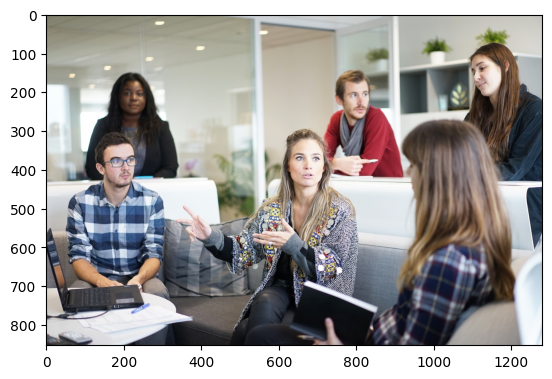

In [ ]:
plt.imshow(imagem)

 O classificador trabalha com imagens em escala de cinza, então será necessário converter essa imagem para escala de cinza:

In [ ]:
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

Visualizando a imagem cinza:

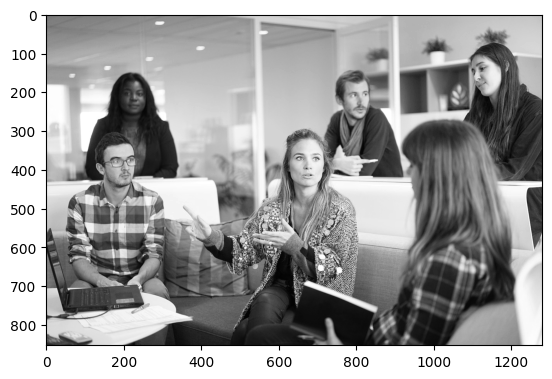

In [ ]:
plt.imshow(imagem_gray, cmap='gray')

Carregando o classificador que é especializado em rostos frontais:

In [ ]:
classificador = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

Verificando quantas faces o classificador extrair da imagem:

In [ ]:
faces = classificador.detectMultiScale(imagem_gray, 1.3, 5)

In [ ]:
len(faces)

5

Trabalhando regiões de interesse.

Primeira face com as devidas coordenadas:

In [ ]:
faces[0]

array([190, 176,  75,  75], dtype=int32)

Desenhando os retângulos em volta de cada rosto:

In [ ]:
imagem_anotada = imagem.copy()

In [ ]:
for (x, y, w, h) in faces:
  cv2.rectangle(imagem_anotada, (x, y), (x + w, y + h), (255, 255, 0), 2)

Visualizando a imagem:

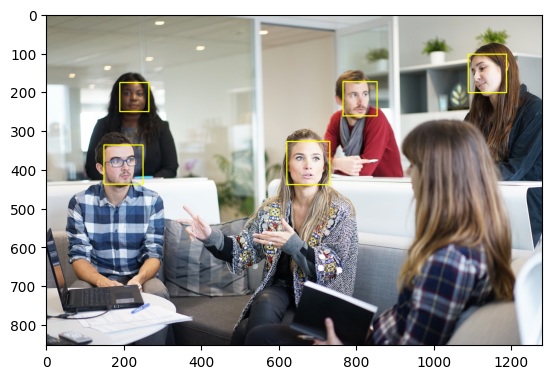

In [ ]:
plt.imshow(imagem_anotada)

Extraindo cada rosto:

In [ ]:
face_imagem = 0
for (x, y, w, h) in faces:
    face_imagem += 1
    imagem_roi = imagem[y:y + h, x:x+ w] # Refere a cada imagem identificada da lista faces.
    imagem_roi = cv2.cvtColor(imagem_roi, cv2.COLOR_BGR2RGB)
    cv2.imwrite('face_' + str(face_imagem) + '.png', imagem_roi)

Atualizando:

In [ ]:
%cd alura-analise-facial


/content/alura-analise-facial


In [ ]:
!git pull


Already up to date.


In [ ]:
!git checkout aula_3
!git pull


Updating files: 100% (1510/1510), done.
Branch 'aula_3' set up to track remote branch 'aula_3' from 'origin'.
Switched to a new branch 'aula_3'
Already up to date.


03. Classificação de faces.

Separação de imagens.

Carregando:

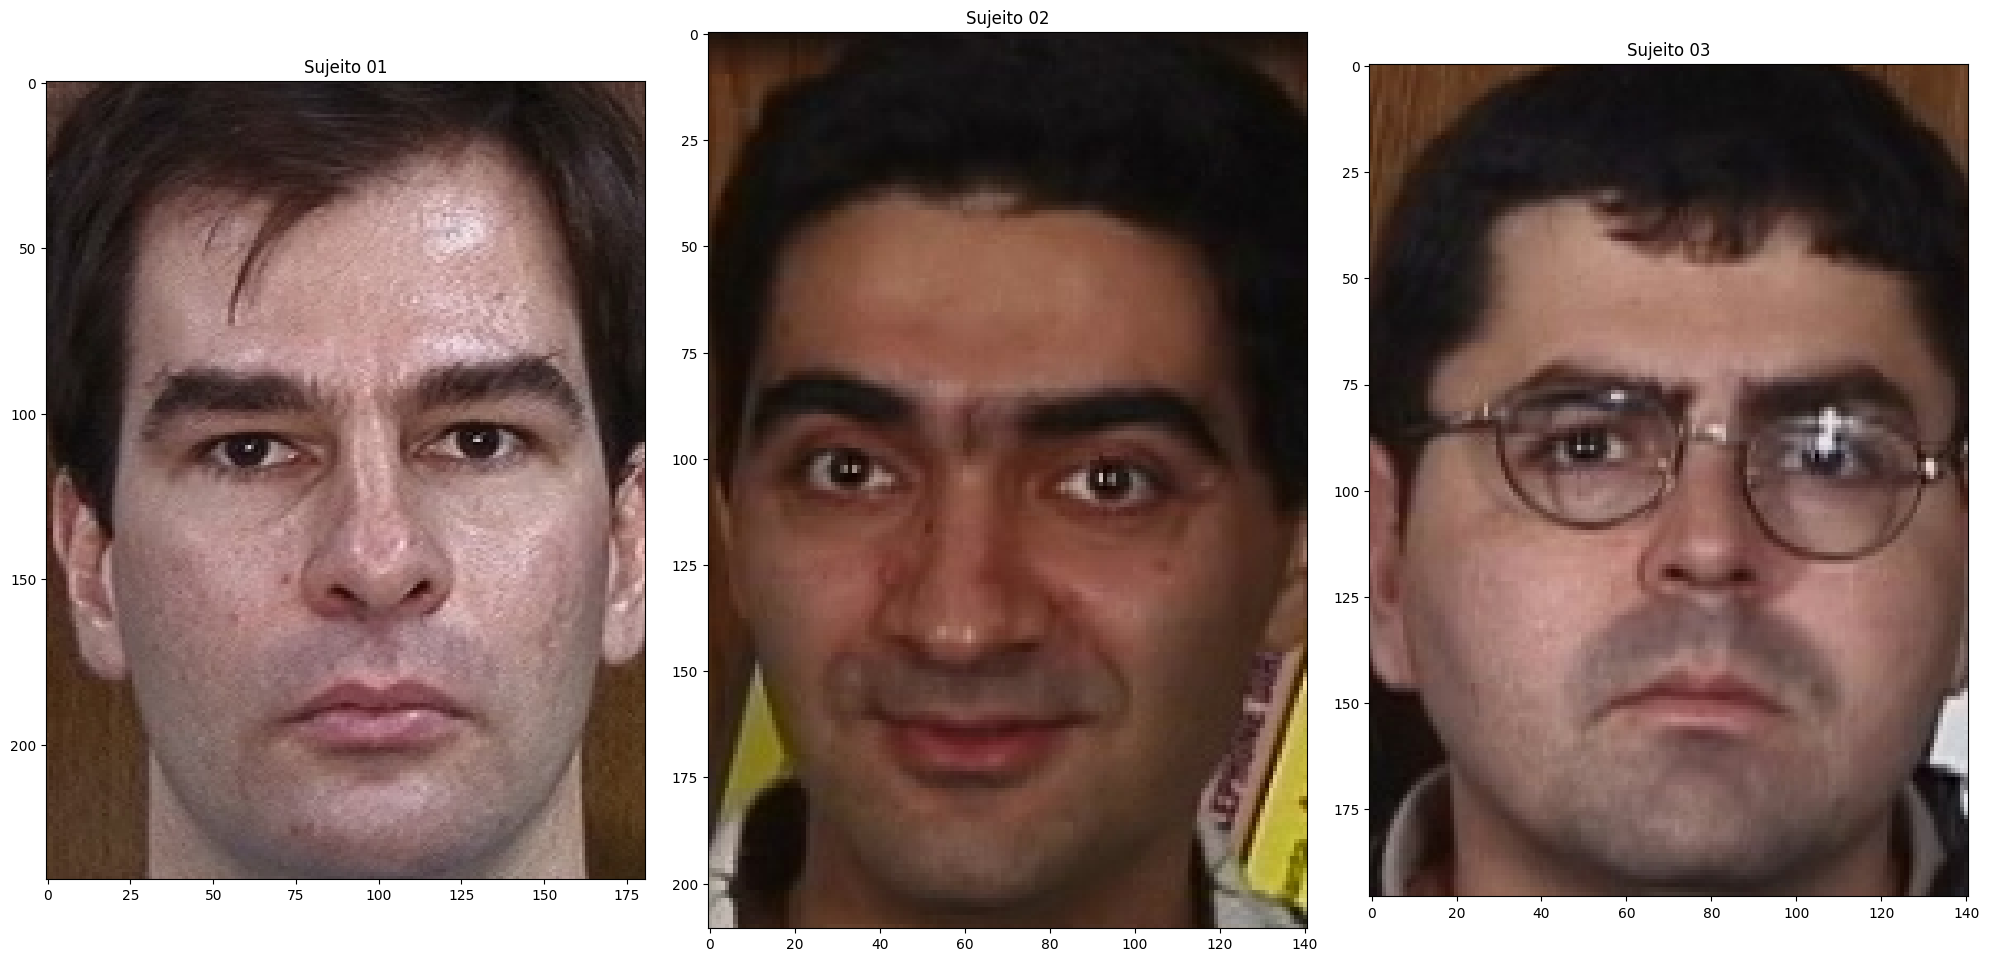

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Carregar e converter as imagens
imagem_face_1 = cv2.imread('/content/alura-analise-facial/imagens/cropped_faces/s01_01.jpg')
imagem_face_1 = cv2.cvtColor(imagem_face_1, cv2.COLOR_BGR2RGB)

imagem_face_2 = cv2.imread('/content/alura-analise-facial/imagens/cropped_faces/s02_01.jpg')
imagem_face_2 = cv2.cvtColor(imagem_face_2, cv2.COLOR_BGR2RGB)

imagem_face_3 = cv2.imread('/content/alura-analise-facial/imagens/cropped_faces/s03_01.jpg')
imagem_face_3 = cv2.cvtColor(imagem_face_3, cv2.COLOR_BGR2RGB)

# Criar uma única figura e plotar as imagens lado a lado
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)  # 1 linha, 3 colunas, 1ª imagem
plt.title('Sujeito 01')
plt.imshow(imagem_face_1)


plt.subplot(1, 3, 2)  # 1 linha, 3 colunas, 2ª imagem
plt.title('Sujeito 02')
plt.imshow(imagem_face_2)


plt.subplot(1, 3, 3)  # 1 linha, 3 colunas, 3ª imagem
plt.title('Sujeito 03')
plt.imshow(imagem_face_3)


# Exibir a figura com todas as imagens lado a lado
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()


OBS: essas imagens têm tamanhos variados

Visualizando os shapes:

In [ ]:
imagem_face_1.shape

(241, 181, 3)

In [ ]:
imagem_face_2.shape

(211, 141, 3)

In [ ]:
imagem_face_3.shape

(196, 141, 3)

OBS: É necessário redimensionar as imagens para um tamanho comum, assim o classificador vai consiguir identificar as mesmas regiões em cada parte do rosto.

Definindo as variáveis para ler o arquivo:

Importando as bibliotecas para lidar com os arquivos.

In [ ]:
from os import listdir, path, makedirs
from os.path import isfile, join

import shutil

In [ ]:
faces_caminho = '/content/alura-analise-facial/imagens/cropped_faces/'

# Criando uma lista de todas as imagens que estão dentro do diretório.
lista_arq_faces = [f for f in listdir(faces_caminho) if isfile(join(faces_caminho, f))]

Visualizando a lista:

In [ ]:
lista_arq_faces[0]

's02_09.jpg'

Verificando a quantidade de imagens:

In [ ]:
len(lista_arq_faces)

750

Separando os arquivos em pastas de treinamento e teste:

In [ ]:
faces_path_treino = '/content/alura-analise-facial/imagens/treino/'
faces_path_teste = '/content/alura-analise-facial/imagens/teste/'


if not path.exists(faces_path_treino):
  makedirs(faces_path_treino)
if not path.exists(faces_path_teste):
  makedirs(faces_path_teste)

for arq in lista_arq_faces:
  sujeito = arq[1:3]                    # Padronização dos arquivos
  numero = arq[4:6]

  if int(numero) <= 10:
    shutil.copyfile(faces_caminho + arq, faces_path_treino + arq)
  else:
    shutil.copyfile(faces_caminho + arq, faces_path_teste + arq)